# Exploratory Activity 15: Using Spatial Data

*prepared in consultation with Dr. Josh Laughner*

Yesterday you learned to use NASA's "[Worldview](https://worldview.earthdata.nasa.gov/)" data visualizer application, an expansive collection of fully processed and publicly available global satellite data. However, not all satellite data sets are available on this platform and there may be a number of different reasons you may want to access the underlying data products directly. As such, today you will learn to directly download, import, and plot satellite data yourself.


In [1]:
# Note this project uses the 'cartopy' mapping library which is best installed with conda 
# (https://docs.conda.io/en/latest/), due to the various dependencies required.

# Creating a virtual environment with this library pre-loading is a reliable way to do this;
# below are Terminal commands which will create a TEST environment with cartopy.

# conda create --name TEST python=3.6 cartopy
# conda activate TEST

In [9]:
%%capture

# first install a libraries for data loading and mapping
!pip install h5py
!pip install numpy
!pip install pandas

## 15.1 Downloading and Importing Spatial Data 

**Question 15.1.1** Much of the data compiled in the Worldview visualizer resides in separate online repositories. One such repository is managed by NASA's Goddard Earth Sciences Data and Information Services Center. Visit the GES DISC website dedicated to the [Ozone Monitoring Instrument's nitrogen dioxide](https://disc.gsfc.nasa.gov/datasets/OMNO2d_V003/summary) data product and choose "Online Archive" from the "Data Access" menu. Follow the instructions at the top of the page to [register](https://disc.gsfc.nasa.gov/data-access) for an Earthdata account and [authorize](https://urs.earthdata.nasa.gov/approve_app?client_id=e2WVk8Pw6weeLUKZYOxvTQ) the proper data archive application.


**Question 15.1.2** Once you have completed the registration process, return to the "Online Archive" page and navigate into the 2013 folder. Click the *.he5 file (as opposed to the *.he5.xml file) for 4 July to download it. 

*Note the location where the file is downloaded on your computer, as you will need to update the "path" in the code below in order to import the file.*


In [10]:
# import the library to access the hdf file contents
import h5py

## UPDATE THIS FILE PATH TO REFLECT THE LOCATION OF THE DOWNLOAD ON YOUR COMPUTER
file_path = "OMI-Aura_L3-OMNO2d_2013m0704_v003-2019m1122t115451.he5"

# read the he5 file into a structure named "f"
f = h5py.File(file_path, 'r+')

The OMI NO<sub>2</sub> data files are in "hierarchical data format," which allows data to be stored in a compact directory-like structure, similar to the folders and subfolders on a computer. At a given level of the data hierarchy, you can display the names of the sub-levels by listing the parent level's keys:


In [11]:
# list f's keys
list(f.keys())

['HDFEOS', 'HDFEOS INFORMATION']

**Question 15.1.3** Complete the path through the file hierarchy that leads to a data set named "ColumnAmountNO2Trop." The "type" function can then be used to identify the type of variable that follows. The correct data set will be a "dataset" type, not a "group" type.

*Hint: The figure below from https://acdisc.gesdisc.eosdis.nasa.gov/ gives a visual representation of the structure of this file.*

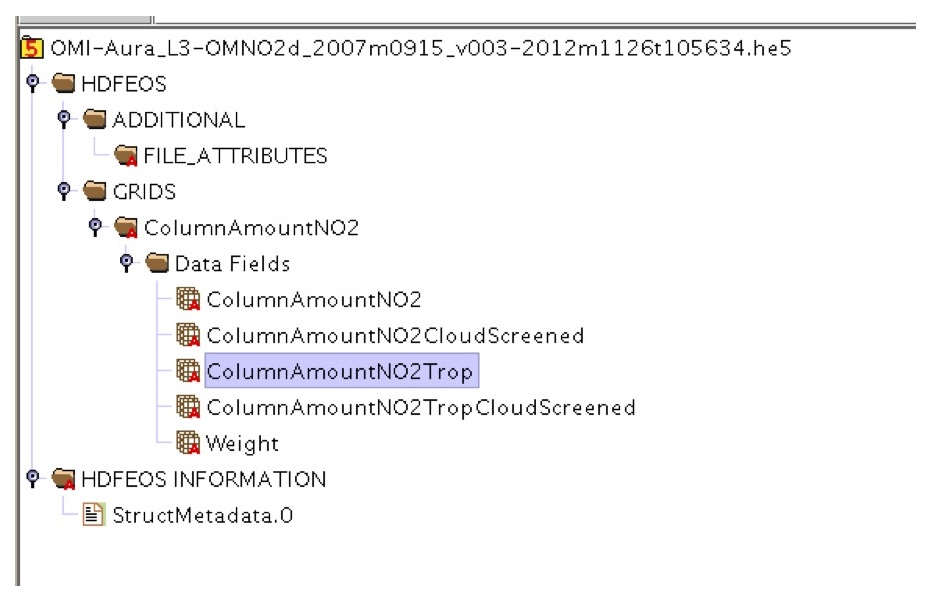

In [12]:
## COMPLETE THE FILE PATH LEADING TO THE DESIRED DATA SET BELOW
path_to_trop = 'HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2Trop'

# read the variable type 
type(f[path_to_trop])
f[path_to_trop]

<HDF5 dataset "ColumnAmountNO2Trop": shape (720, 1440), type "<f4">

**Question 15.1.4** Once you have charted a path to the appropriate data set, assign the data set to the variable "NO2_trop." Note that you will need to append a bracketed colon symbol "[:]" to the end of the variable name so that the computer knows to read in the variable's contents rather than its name.

In [13]:
NO2_trop = []
NO2_trop[:] = f[path_to_trop]

Once you have obtained the data you need, it is best practice to close the original data file so that your jupyter notebook does not have to keep track of it. Use the sample code below to do so when appropriate; you will still have access to new variables you created based on the data file, but will have to reload the file if you want to navigate through it or extract other data sets.


In [14]:
f.close()

## 15.2 Plotting Spatial Data

**Question 15.2.1** The data set you have just imported is a level3 data product, meaning that it has been averaged onto a regularly spaced grid for you. The coordinates of said grid are not, however, included in the file, so before you are able to plot a map of the NO2_trop variable, you will need to create gridded latitude and longitude variables yourself. Note that the first grid cell has edges at 180<sup>o</sup> W longitude and 90<sup>o</sup> S latitude, and there is a 0.25<sup>o</sup> spacing between grid cells.

*Hint 1: The final latitude and longitude arrays should be the same size as the NO2_trop array.*

*Hint 2: You may find the functions np.arange, np.tile, and [array].shape useful. Google their documentation for more information.*


In [15]:
import numpy as np
lon = np.arange(-180,180,0.25)
lat = np.arange(-90,90,0.25)

Once you have successfully created your latitude and longitude arrays, use the code below to plot a colored map of the NO2_trop variable. The first time you use the "coastlines" command, some data will be downloaded from the internet; you may ignore any warning that appears.


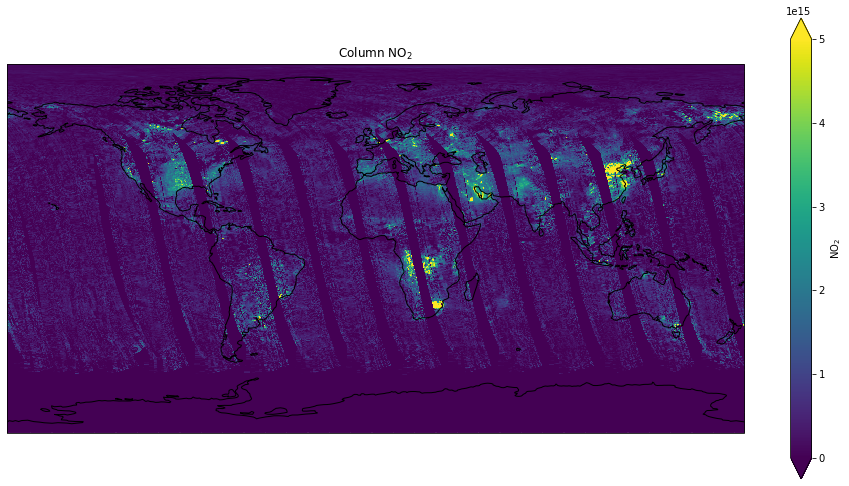

In [16]:
# import mapping and graphing libraries
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# create the figure
fig = plt.figure()

# define the map bounds
ax = fig.add_axes([0.1,0.1,0.8,0.8], projection=ccrs.PlateCarree())

# add the data and color range
h = ax.pcolormesh(lon, lat, NO2_trop, vmin=0, vmax=5e15)
plt.colorbar(h, label='NO$_2$', extend='both')

# show the coastlines layer
ax.coastlines()
fig.set_size_inches(16,8)

# add a title
ax.set_title('Column NO$_2$')

# show the chart
plt.show()

**Question 15.2.2** Examine the map you created above closely. Do high NO<sub>2</sub> column densities appear to be associated with rural or urban areas?


**Question 15.2.3** Use the functions set_xlim and set_ylim to re-make your plot from before, but “zoomed in” on the state of California. 

*Hint 1: Google the documentation for these matplotlib functions to find the necessary arguments.*

*Hint 2: Many online sites allow you to extract the map bounds. Try [openstreetmap.org](https://www.openstreetmap.org/export) or another website of your choosing.* 

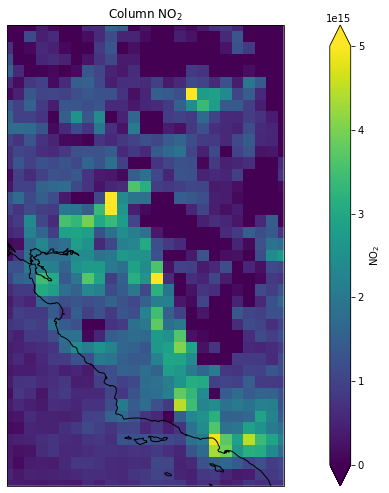

In [17]:

# create the figure
fig = plt.figure()

# define the map bounds
ax = fig.add_axes([0.1,0.1,0.8,0.8], projection=ccrs.PlateCarree())

# add the data and color range
h = ax.pcolormesh(lon, lat, NO2_trop, vmin=0, vmax=5e15)
plt.colorbar(h, label='NO$_2$', extend='both')

# show the coastlines layer
ax.coastlines()
fig.set_size_inches(16,8)

ax.set_xlim(-123,-117)
ax.set_ylim(33, 43)

# add a title
ax.set_title('Column NO$_2$')

# show the chart
plt.show()

**Question 15.2.4** Now "zoom in" on the San Francisco Bay Area only. Approximately how many OMI pixels are used to represent the BEACO<sub>2</sub>N domain? What are the pros and cons of the satellite remote sensing vs. in situ monitoring network approaches?


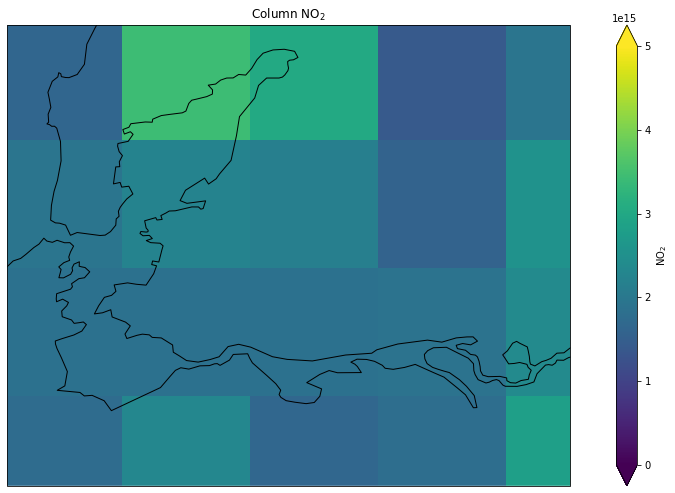

In [18]:
# create the figure
fig = plt.figure()

# define the map bounds
ax = fig.add_axes([0.1,0.1,0.8,0.8], projection=ccrs.PlateCarree())

# add the data and color range
h = ax.pcolormesh(lon, lat, NO2_trop, vmin=0, vmax=5e15)
plt.colorbar(h, label='NO$_2$', extend='both')

# show the coastlines layer
ax.coastlines()
fig.set_size_inches(16,8)

ax.set_xlim(-122.6,-121.5)
ax.set_ylim(38.3, 37.4)

# add a title
ax.set_title('Column NO$_2$')

# show the chart
plt.show()

## 15.3 Comparing Spatial Data

**Question 15.3.1** Back on the GES DISC website, use the "Parent Directory" link to navigate back to the original NO<sub>2</sub> data directory. Clicking "Parent Directory" again will allow you to view the various other level3 data products available from the OMI platform. Choose another atmospheric species, download its 4 July 2013 *.he5 file, and make a map of this species's global distribution, using the NO<sub>2</sub> steps above as a guide.

*Hint 1: In each data product's directory, there is a sub-directory called "doc" that contains helpful documentation. You should consult these documents to ensure that you understand the physical significance of the quantities you are plotting.*

*Hint 2: The numerical magnitudes vary widely from data set to data set. The "vmin" and "vmax" arguments in the pcolormesh function can be used to manipulate the range of values included in the colorbar to facilitate the best possible visualization of the variable.*


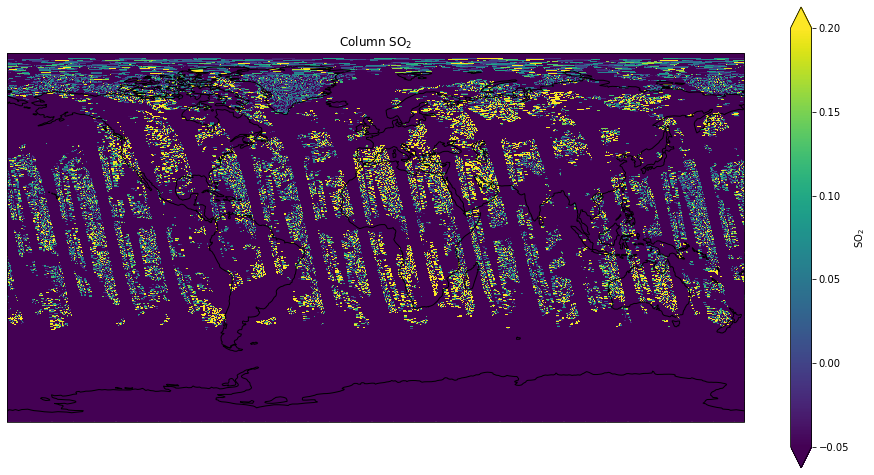

In [19]:
file_path_so2 = "OMI-Aura_L3-OMSO2e_2013m0704_v003-2020m1015t195614.he5"

# read the he5 file into a structure named "f"
g = h5py.File(file_path_so2, 'r+')
path_to_trop_so2 = 'HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fields/ColumnAmountSO2'
SO2_trop = []
SO2_trop[:] = g[path_to_trop_so2]
g.close()
lon = np.arange(-180,180,0.25)
lat = np.arange(-90,90,0.25)
fig = plt.figure()

# define the map bounds
ax = fig.add_axes([0.1,0.1,0.8,0.8], projection=ccrs.PlateCarree())

# add the data and color range
h = ax.pcolormesh(lon, lat, SO2_trop, vmin=-0.05, vmax=0.2)
plt.colorbar(h, label='SO$_2$', extend='both')

# show the coastlines layer
ax.coastlines()
fig.set_size_inches(16,8)

# add a title
ax.set_title('Column SO$_2$')

# show the chart
plt.show()

**Question 15.3.2** Compare this map to one you made of global NO<sub>2</sub>. Based on a simple visual inspection, how does your new variable appear to be related to NO<sub>2</sub>? Are these species correlated, anti-correlated, unrelated, or somewhere in between?


**Question 15.3.3** Make a correlation plot of the two variables to verify your answer above. Note that there are a number of pixels that contain nonphysical, negative "fill values" in each data product, and these should be filtered out before plotting.

*Hint: If you don't remember how to replace fill values with NaNs, consult Exploratory Activity 2.*

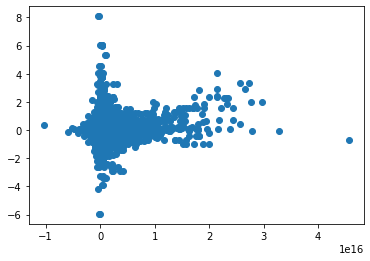

In [23]:
import pandas as pd
SO2_df = pd.DataFrame(SO2_trop)
NO2_df = pd.DataFrame(NO2_trop)

SO2_fill = np.min(SO2_trop)
NO2_fill = np.min(NO2_trop)

SO2_df = SO2_df.replace(SO2_fill,np.NaN)
NO2_df = NO2_df.replace(NO2_fill,np.NaN)
fig, ax = plt.subplots(num=None, facecolor='w', edgecolor='k')
ax.scatter(NO2_df, SO2_df)

## 15.4 Other Spatial Data Formats

Beyond the OMI data products, *.he5 is not the only format in which satellite data is reported. While there are many other conventions, another file format that is commonly used to organize geospatial data is netCDF, which is given the suffix *.nc. The code below installs and imports the libraries necessary for handling this alternative data format.

In [2]:
%%capture

# install a library to load netCDf files
!pip install netCDF4

# import netCDF Dataset module to support data loading
from netCDF4 import Dataset

**Question 15.4.1** To practice importing and handling a netCDF file, use the "Parent Directory" link to navigate out of the Aura_OMI_Level3 directory and view the other instrumentation with available data sets. Choose "CMS" and then "CMS_CH4_FLX_NAD" to see the data products released from the Carbon Monitoring System. Download an *.nc file of your choice. 

Replace the filename and location in the code below to import the file. 

In [37]:
## UPDATE THIS FILE PATH TO REFLECT THE LOCATION OF THE DOWNLOAD ON YOUR COMPUTER
file_path = "CH4_flux_20110112.nc"

# load the data
f = Dataset(file_path, mode='r')

**Question 15.4.2** While this is similar to how you imported the *.he5 files, netCDF files are not organized into a "hierarchical" structure, so you access the data sets directly. You can, however, still display the "keys" of the data set to list the variables available. Each variable also has "attributes" that you can display the names and/or contents of. These traits are common to *.he5 and *.nc files. Modify the code below to explore the *.nc file as you desire.

In [38]:
# display the variable keys
f.variables.keys()

dict_keys(['Lon', 'Lat', 'emissions', 'emissions_nmol'])

In [39]:
## UPDATE THIS CODE WITH THE NAME OF ONE OF THE VARIABLES ABOVE
## TO DISPLAY ITS ATTRIBUTES
f.variables['emissions_nmol'].ncattrs()

['long_name', 'unit', 'valid_range']

In [40]:
## UPDATE THIS CODE WITH THE NAME OF ONE OF THE VARIABLE ATTRIBUTES ABOVE
## TO DISPLAY ITS CONTENTS
f.variables['emissions_nmol'].unit

'nmol/(m2 s)'

For this data product, the necessary the longitudes and latitudes are provided in the *.nc file. Use the code below to save these values to a variable.

In [48]:
# store the lon and lat variables
lon = f.variables['Lon'][:]
lat = f.variables['Lat'][:]

**Question 15.4.3** Choose one of the remaining "CH4_FLX" variables you would like to make a map of. Note that these are three dimensional variables, so you will need to choose a single vertical layer to display.

In [47]:
emissions = f.variables['emissions'][:]
print(emissions.shape)
emissions_1 = emissions[0]

(12, 121, 151)


**Question 15.4.4** Repeat (or "tile") the longitude and latitude variables created above to create new variables with the same "shape" as the measurement you will be mapping.

**Question 15.4.5** Make a plot of the data using the tiled longitude and latitude variables. Remember that you can adjust the "vmin" and "vmax" of your pcolormesh to make the variability in the values more visible.

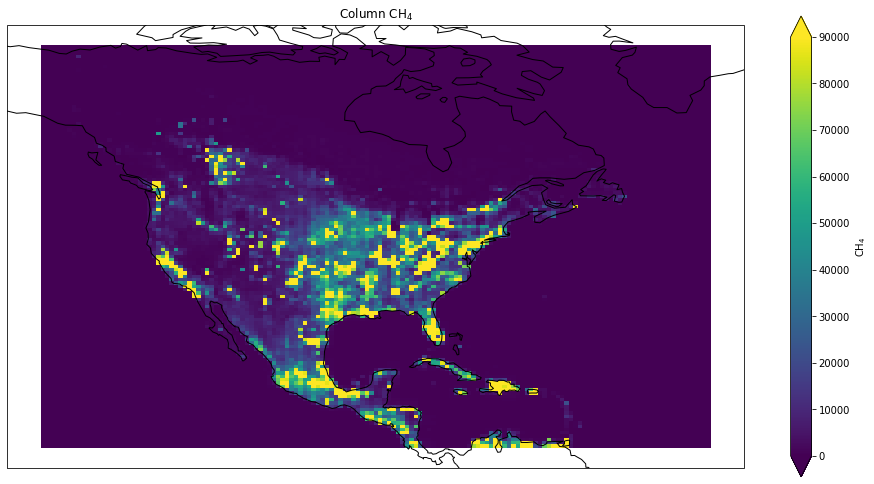

In [49]:
# plot the data
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8], projection=ccrs.PlateCarree())
h = ax.pcolormesh(lon, lat, emissions_1, vmin=0, vmax=90000)
plt.colorbar(h, label='CH$_4$', extend='both')
ax.coastlines()
fig.set_size_inches(16,8)
ax.set_title('Column CH$_4$')
plt.show()

As a reminder, it is still best practice to close the file once you have imported the data you need.


In [50]:
f.close()

## 15.5 Independent Exploration of Spatial Data

**Question 15.5.1** Pose a simple scientific question of your choosing that could be reasonably answered using any of the satellite data sets available on the GES DISC website. You may or may not have time to answer it in full today, but you should start and see how far you get! A few ideas are given below to help you brainstorm.

1. Compare measurements made by different (spaceborne or ground-based) instruments 
    * see Exploratory Activity 1 to access BEACO<sub>2</sub>N data
2. Contrast weekday vs. weekend levels of the same pollutant 
    * see Exploratory Activity 3
3. Analyze the long term (i.e., multiannual) trend in a given atmospheric variable

In [ ]:
## ENTER CODE HERE TO EXPLORE SPATIAL DATA OF YOUR CHOOSING

**Discussion Questions.** If you have time, pair up with a partner and discuss the following:

1. What was your scientific question, and how did you try to answer it? What did you find?
2. How many data files did you use in your analysis? Did you do any averaging or other analysis to combine multiple files? Do you think your approach was truly representative of the different phenomena you wanted to explore?
3. If you had more time, what would you do next?